In [85]:
import json
import networkx as nx

In [86]:
data = json.load(open('team.json', 'r'))

In [87]:
m = {}
for node in data['nodes']:
    m[node['id']] = node['label']

In [88]:
g = nx.Graph()
dg = nx.DiGraph()

for edge in data['edges']:
    s = edge['source']
    t = edge['target']
    g.add_edge(s, t)
    dg.add_edge(s, t, weight=1.0)

In [89]:
print(g.is_directed(), dg.is_directed())

False True


In [90]:
print('# of edges: {}'.format(g.number_of_edges()))
print('# of nodes: {}'.format(g.number_of_nodes()))

# of edges: 72
# of nodes: 73


In [91]:
#g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

In [92]:
import matplotlib.pyplot as plt

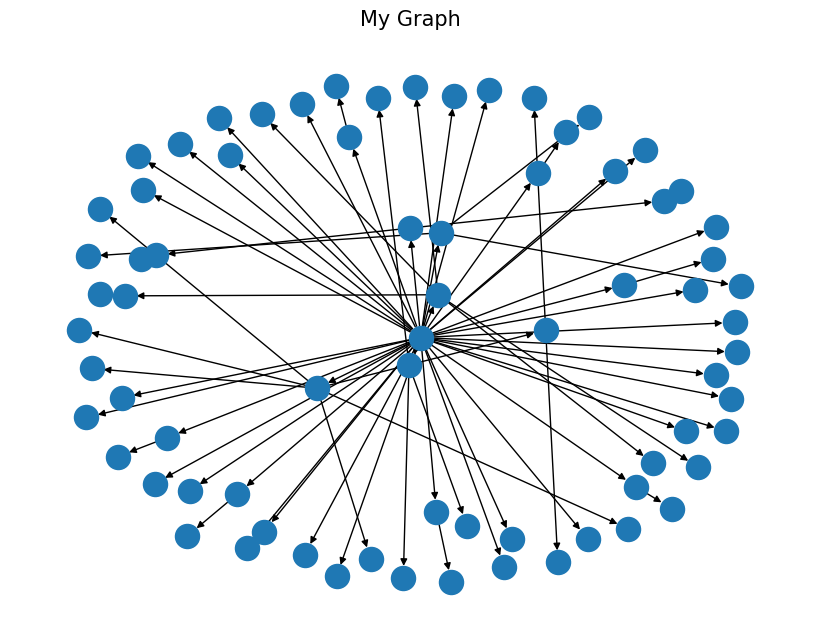

In [93]:
plt.figure(figsize=(8, 6))
nx.draw(dg)#, pos=node_positions, edge_color=edge_colors, node_size=10, node_color='black')
plt.title('My Graph', size=15)
plt.show()

In [94]:
g.size()

72

In [95]:
for i in m.keys():
    n = len(list(dg.neighbors(i)))
    if n > 1:
        print(m[i], n)

Kevin Mocker 3
Avi 2
Bob (Flockmeister) 2
Rob P 6
Susan 41
Adrienne 3
Robin 5


In [96]:
list(g.neighbors(1))

[2, 3]

In [97]:
dg.degree

DiDegreeView({1: 2, 2: 1, 3: 41, 4: 1, 5: 4, 6: 1, 7: 3, 8: 1, 9: 1, 10: 1, 11: 2, 12: 1, 13: 2, 14: 1, 15: 1, 16: 1, 17: 2, 18: 1, 19: 1, 20: 1, 21: 2, 22: 2, 23: 2, 24: 1, 25: 1, 26: 4, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 7, 39: 6, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 2, 47: 1, 48: 1, 49: 3, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 2, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 2, 70: 1, 71: 1, 72: 1, 73: 1})

In [98]:
dg.order()

73

In [99]:
#nx.dijkstra_path()

In [15]:
nx.algorithms.all_pairs_bellman_ford_path

<function networkx.algorithms.shortest_paths.weighted.all_pairs_bellman_ford_path(G, weight='weight')>

In [16]:
nx.algorithms.all_pairs_dijkstra

<function networkx.algorithms.shortest_paths.weighted.all_pairs_dijkstra(G, cutoff=None, weight='weight')>

In [17]:
arr = []
for item in nx.algorithms.all_pairs_shortest_path(g):
    arr.append(item)

In [19]:
nx.algorithms.all_triads

<function networkx.algorithms.triads.all_triads(G)>

In [20]:
nx.algorithms.all_triplets

<function networkx.algorithms.triads.all_triplets(G)>

In [37]:
# nx.algorithms.dag_longest_path(g)

In [21]:
nx.algorithms.descendants

<function networkx.algorithms.dag.descendants(G, source)>

# All Pairs

In [102]:
d = nx.algorithms.floyd_warshall(g)

In [103]:
rows = []
for i in d.keys():
    for j in d[i]:
        if i < j:
            distance = d[i][j]
            row = {
                'i': i,
                'j': j,
                'distance': distance
            }
            rows.append(row)

In [104]:
import pandas as pd

# Most distance

In [105]:
df = pd.DataFrame(rows)

In [106]:
df.sort_values('distance', ascending=False, inplace=True)

In [107]:
max_distance = df.iloc[0]['distance']
most_distant_df = df[df['distance'] == max_distance].copy()

In [108]:
label_map = {}
for node in data['nodes']:
    nid = node['id']
    label = node['label']
    label_map[nid] = label

In [109]:
most_distant_df['a'] = most_distant_df['i'].apply(lambda x: label_map[x])
most_distant_df['b'] = most_distant_df['j'].apply(lambda x: label_map[x])

In [110]:
most_distant_df

,i,j,distance,a,b
2614,68,70,6.0,Ryan,Ron Frere
2576,63,67,6.0,Francoise,Kerig
2577,63,68,6.0,Francoise,Ryan
2481,56,63,6.0,Faith,Francoise
2579,63,70,6.0,Francoise,Ron Frere
2609,67,70,6.0,Kerig,Ron Frere
2485,56,67,6.0,Faith,Kerig
2486,56,68,6.0,Faith,Ryan


# Multi-level marketing success

Imagine this game as a multi-level marketing scam in which players must pay 1 dollar admission.  0.50 goes to the person that recruited them, 0.30 to the recruiter's recruiter, and 0.20 to the recruiter's recruiter's recruter.  Assuming all 74 attendees joined including Larry, how much income would Susan be generating?

In [111]:
g.number_of_nodes()

73

In [112]:
g.is_directed()

False

In [132]:
balance = {}
for node in dg.nodes():
    balance[node] = 0

completed = {}
done = False
rate = 0.5
no_descendant_count = 0

x = 6

while not(done) and x > 0:
    n = len(completed)
    done = True
    for node in dg.nodes():
        if node in completed:
            continue
        arr = list(dg.neighbors(node))
        do_payout = True
        if len(arr) == 0:
            do_payout = False
            completed[node] = True
        for child in arr:
            if child not in completed:
                do_payout = False
        if do_payout:
            for child in arr:
                amt = 1 + balance[child] * rate
                balance[child] -= amt
                balance[node] += amt
            completed[node] = True
            print(label_map[child], 'pays', label_map[node], amt, 'bringing balance to', balance[node])
        elif node not in completed:
            done = False
    x -= 1

Heather pays Wendy 1.0 bringing balance to 1.0
Vincent pays Adrienne 1.0 bringing balance to 3.0
Terry Kerby pays Brian Kerby 1.0 bringing balance to 1.0
Jamie Brown pays Caspian 1.0 bringing balance to 1.0
Jamie Knapp pays Gail Knapp 1.0 bringing balance to 1.0
Hayley pays Jim Newman 1.0 bringing balance to 1.0
Jane Felton pays Karen Araujo 1.0 bringing balance to 1.0
Ben Bellinger pays Karl Withakay 1.0 bringing balance to 1.0
Vanessa pays Kevin Mocker 1.0 bringing balance to 3.0
Francoise pays Isabella 1.0 bringing balance to 1.0
Ryan pays Bob (Flockmeister) 1.0 bringing balance to 2.0
Faith pays Ramiro 1.0 bringing balance to 1.0
Ron Frere pays Alan 1.0 bringing balance to 1.0
Ramiro pays Avi 1.5 bringing balance to 3.0
Teri pays Rob P 1.0 bringing balance to 7.0
Peggy pays Robin 1.0 bringing balance to 5.5
Zeek pays Susan 1.0 bringing balance to 55.25


In [133]:
print(1 - no_descendant_count/74)

1.0


In [134]:
rows = []
for v in balance.keys():
    rows.append({"name": label_map[v], "balance":balance[v]})

df = pd.DataFrame(rows)

In [135]:
df.sort_values('balance', ascending=False, inplace=True)

In [143]:
sum(df['balance'] < 0)

66

In [137]:
df.shape

(73, 2)

In [138]:
df

,name,balance
2,Susan,55.25
37,Rob P,2.50
38,Robin,1.75
4,Adrienne,0.50
6,Avi,0.50
...,...,...
35,Richard McDonald,-1.00
1,Heather,-1.00
39,Ross Blocher,-1.00
40,Sharon Roney,-1.00


In [67]:
df[df['balance'] < 1].shape

(24, 2)

In [61]:
df.iloc[1]['balance'] / df.iloc[0]['balance']

0.160732451678535

In [ ]:
nx.algorithms.google_matrix

In [ ]:
nx.algorithms.k_nearest_neighbors

In [ ]:
nx.algorithms.minimum_cut

In [ ]:
nx.algorithms.pagerank

In [ ]:
nx.algorithms.